In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Загрузка данных и первичный анализ

1.1. Импортировать библиотеки: pandas, numpy, scikit-learn (модели, CV, метрики), matplotlib (для графиков).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import Bunch
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
    ConfusionMatrixDisplay
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV


1.2. Загрузить выбранный CSV в pandas.DataFrame.

* Загрузим набор данных S06-hw-dataset-04.csv

In [3]:
# Путь к основной папке
base_dir = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)'

os.chdir(base_dir) # Замена текущей директории на данную папку
print("Текущая директория:", os.getcwd())

ds = pd.read_csv('Datasets/S06-hw-dataset-04.csv')

Текущая директория: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)


1.3. Зафиксировать минимум:

    1.3.1. head(), info(), базовая статистика (describe() или аналог);
    1.3.2. распределение таргета target (доли классов);
    1.3.3. (желательно) проверка пропусков и типов столбцов.

1.3.1. head(), info(), базовая статистика (describe() или аналог);

* Узнаем количество строк и столбцов

In [4]:
print("Количество строк:", ds.shape[0])
print("Количество столбцов:", ds.shape[1])

Количество строк: 25000
Количество столбцов: 62


* head(), info(), базовая статистика (describe() или аналог);

In [5]:
ds.head(5).T

,0,1,2,3,4
id,1.000000,2.000000,3.000000,4.000000,5.000000
f01,-1.250210,0.074328,0.638481,1.712916,0.905676
f02,1.423474,0.376429,0.060968,-1.350969,-0.206545
f03,-0.225004,0.212831,0.746760,-0.256473,-0.068806
f04,-4.023138,-0.502074,2.479653,1.622074,4.086026
...,...,...,...,...,...
f57,1.355697,1.735220,0.829103,3.823409,4.298572
f58,-5.338924,-3.827828,-0.085985,0.880395,-1.558235
f59,1.153944,0.292165,2.891408,1.148610,0.924673
f60,-0.153934,0.273720,0.766221,0.136732,0.111668


* Посмотрим информацию о признаках

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

* Просмотрим описательную статистику признаков с помощью с помощью метода  **.describe()**, округлив значения до 2-х знаков после запятой c помощью **round()**

In [7]:
ds.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,25000.0,12500.50,7217.02,1.00,6250.75,12500.50,18750.25,25000.00
f01,25000.0,-0.00,1.00,-4.37,-0.68,0.00,0.68,4.21
f02,25000.0,-0.00,1.00,-4.09,-0.68,-0.00,0.66,3.98
f03,25000.0,0.00,1.00,-4.10,-0.68,0.01,0.68,3.79
f04,25000.0,0.34,3.21,-13.25,-1.75,0.40,2.49,15.29
...,...,...,...,...,...,...,...,...
f57,25000.0,0.89,2.45,-9.51,-0.74,0.89,2.52,11.88
f58,25000.0,-0.91,1.96,-7.92,-2.23,-0.92,0.40,6.78
f59,25000.0,0.00,0.99,-4.04,-0.67,0.00,0.67,3.83
f60,25000.0,-0.00,1.00,-3.81,-0.67,0.00,0.67,4.01


1.3.2. распределение таргета target (доли классов);


Распределение (абсолютные значения и проценты):
Абсолютное значения


,count
target,
0,23770
1,1230


Процентное распределение


,proportion
target,
0,95.08
1,4.92


/tmp/ipython-input-2036643353.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=ds, palette='Set2')


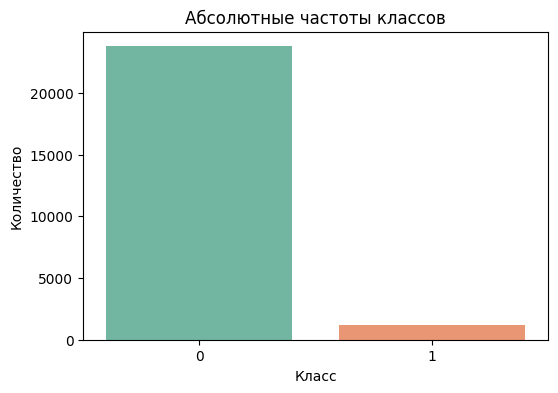

In [8]:
print("\nРаспределение (абсолютные значения и проценты):")
dist = ds['target'].value_counts()
dist_pct = ds['target'].value_counts(normalize=True) * 100
print("Абсолютное значения")
display(dist)
print("Процентное распределение")
display(dist_pct)


plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=ds, palette='Set2')
plt.title('Абсолютные частоты классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

1.3.3. Проверка пропусков и типов столбцов.

**Проверка пропущенных значений**
* Метод isnull() возвращает DataFrame с True/False, где True — пропущенное значение, а sum() подсчитывает количество True (т.е. пропусков) по каждому столбцу


**Проверка типов данных столбцов**
* dtypes — атрибут DataFrame, содержащий тип данных каждого столбца


In [9]:
# 1. Проверка пропущенных значений
print("=== Пропущенные значения по столбцам ===")
missing_values = ds.isnull().sum()
display(missing_values)

# Выведем процент пропущенных значений
print("\n=== Процент пропущенных значений по столбцам ===")
missing_percent = (missing_values / len(ds)) * 100
display(missing_percent.round(2))  # Округляем до 2 знаков после запятой

# 2. Проверка типов данных столбцов
print("\n=== Типы данных столбцов ===")
display(ds.dtypes)

# Сводка по датасету (включая типы и пропуски)
print("\n=== Краткая сводка о датасете ===")
display(ds.info())

=== Пропущенные значения по столбцам ===


,0
id,0
f01,0
f02,0
f03,0
f04,0
...,...
f57,0
f58,0
f59,0
f60,0



=== Процент пропущенных значений по столбцам ===


,0
id,0.0
f01,0.0
f02,0.0
f03,0.0
f04,0.0
...,...
f57,0.0
f58,0.0
f59,0.0
f60,0.0



=== Типы данных столбцов ===


,0
id,int64
f01,float64
f02,float64
f03,float64
f04,float64
...,...
f57,float64
f58,float64
f59,float64
f60,float64



=== Краткая сводка о датасете ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  

None

1.4. Определить:

* x – признаки (все столбцы, кроме target; столбец id не использовать как признак);
* y – таргет (target).

In [10]:
# Определяем y — таргет
y = ds['target']

# Определяем x — все столбцы, кроме 'target' и 'id'
X = ds.drop(columns=['id', 'target'])

print("Форма x:", X.shape)
print("Форма y:", y.shape)

Форма x: (25000, 60)
Форма y: (25000,)


# 2. Train/Test-сплит и воспроизводимость

2.1. Разделить данные на train/test:

* test_size разумный (например, 0.2 или 0.25);
* обязательно фиксировать random_state (например, 42);
* для классификации – использовать stratify=y.

In [11]:
from sklearn.model_selection import train_test_split
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% под тест, 80% под обучение
    random_state=42,        # фиксируем случайность
    stratify=y              # сохраняем распределение классов (обязательно для классификации!)
)

# Проверка формы
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Проверка баланса классов (опционально, но полезно)
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Размер обучающей выборки: (20000, 60)
Размер тестовой выборки: (5000, 60)

Распределение классов в обучающей выборке:
target
0    0.9508
1    0.0492
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
target
0    0.9508
1    0.0492
Name: proportion, dtype: float64


2.2. Почему фиксированный seed и стратификация важны.

Фиксированный random_state(seed) необходим, чтобы гарантировать воспроизводимость результатов псевдослучайной генерации — если дать алгоритму одну и ту же «отправную точку», то при каждом запуске кода он будет создавать одну и ту же последовательность чисел. Это критично для:

* отладки,
* сравнения моделей,
* научной честности и воспроизводимости экспериментов.

# 3. Baseline’ы

Сделать минимум два baseline’а:

1. DummyClassifier (например, most_frequent или stratified).
2. LogisticRegression (желательно через Pipeline(StandardScaler + LogisticRegression)).

Для обоих baseline’ов посчитать метрики на test (см. ниже) и кратко интерпретировать.

3.1. DummyClassifier (например, most_frequent или stratified).

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# === Вариант 1: strategy='most_frequent' ===
print("=== DummyClassifier (strategy='most_frequent') ===")
dummy_mf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_mf.fit(X_train, y_train)

y_pred_mf = dummy_mf.predict(X_test)
y_proba_mf = dummy_mf.predict_proba(X_test)[:, 1]  # вероятности класса 1

# Метрики
print("Accuracy :", accuracy_score(y_test, y_pred_mf))
print("Precision:", precision_score(y_test, y_pred_mf, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_mf, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_mf, zero_division=0))

# ROC-AUC (может не работать, если все предсказания одинаковые)
try:
    auc = roc_auc_score(y_test, y_proba_mf)
    print("ROC-AUC  :", auc)
except ValueError as e:
    print("ROC-AUC не определён (все предсказания одинаковые):", e)


# === Вариант 2: strategy='stratified' ===
print("\n=== DummyClassifier (strategy='stratified') ===")
dummy_strat = DummyClassifier(strategy='stratified', random_state=42)
dummy_strat.fit(X_train, y_train)

y_pred_strat = dummy_strat.predict(X_test)
y_proba_strat = dummy_strat.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_strat))
print("Precision:", precision_score(y_test, y_pred_strat, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_strat, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_strat, zero_division=0))

try:
    auc = roc_auc_score(y_test, y_proba_strat)
    print("ROC-AUC  :", auc)
except ValueError as e:
    print("ROC-AUC не определён:", e)

=== DummyClassifier (strategy='most_frequent') ===
Accuracy : 0.9508
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5

=== DummyClassifier (strategy='stratified') ===
Accuracy : 0.905
Precision: 0.03643724696356275
Recall   : 0.036585365853658534
F1-score : 0.036511156186612576
ROC-AUC  : 0.4932611305498836


**Интерпретация:**

Модель всегда предсказывает 0 (non-default), так как он составляет примерно 95% выборки.
Accuracy будет высокой (~0.95), но F1 ≈ 0 и ROC-AUC ≈ 0.5 — модель не улавливает дефолты. Это "нулевая" гипотеза


Бейзлайн-модель DummyClassifier(strategy='most_frequent') показала accuracy 0.905 и ROC-AUC 0.493 — это означает, что она просто предсказывает самый частый класс (недефолт) и не способна выявлять риски, так как recall и precision равны нулю.


3.2. LogisticRegression (желательно через Pipeline(StandardScaler + LogisticRegression)).

=== LogisticRegression Baseline ===
Лучший параметр C      : 0.01
CV ROC-AUC (на train)  : 0.8235

=== Метрики на TEST ===
Accuracy               : 0.9622
Precision              : 0.9385
Recall                 : 0.2480
F1-score               : 0.3923
ROC-AUC                : 0.8380


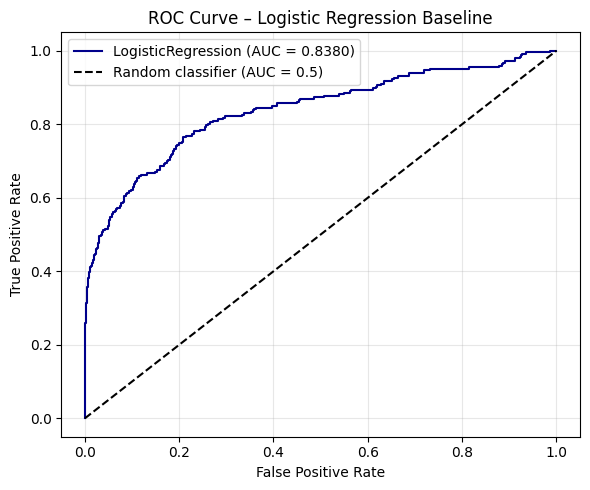

In [13]:
from sklearn.pipeline import Pipeline

# Фиксируем random_state для воспроизводимости
RANDOM_STATE = 42

# Создаём pipeline: масштабирование + логистическая регрессия
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

# Подбор гиперпараметра C (регуляризация) через кросс-валидацию
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search = GridSearchCV(
    logreg_pipe,
    param_grid,
    cv=5,               # 5 фолдов
    scoring="roc_auc",  # оптимизируем ROC-AUC
    n_jobs=-1           # использовать все ядра
)

# Обучение на train
grid_search.fit(X_train, y_train)

# Лучшая модель
best_logreg = grid_search.best_estimator_

# Предсказания на test
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]  # вероятности класса 1

# Расчёт метрик
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

# Вывод результатов
print("=== LogisticRegression Baseline ===")
print(f"Лучший параметр C      : {grid_search.best_params_['logreg__C']}")
print(f"CV ROC-AUC (на train)  : {grid_search.best_score_:.4f}")
print()
print("=== Метрики на TEST ===")
print(f"Accuracy               : {acc:.4f}")
print(f"Precision              : {prec:.4f}")
print(f"Recall                 : {rec:.4f}")
print(f"F1-score               : {f1:.4f}")
print(f"ROC-AUC                : {auc:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'LogisticRegression (AUC = {auc:.4f})', color='darkblue')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression Baseline')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



**Интерпретация:**

Логистическая регрессия достигла accuracy 0.9622 и ROC-AUC 0.8380, что свидетельствует о значительном прогрессе в распознавании.

# 4. Модели недели 6

* Реализовать и сравнить минимум 3 модели недели 6 (рекомендуется 4):

Общая функция для оценки метрик

In [14]:
def evaluate_model(model, name):

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC : {roc:.4f}")
    return {'model': name, 'acc': acc, 'f1': f1, 'roc': roc}

4.1. DecisionTreeClassifier

Обязательно показать контроль сложности (например, max_depth + min_samples_leaf; или ccp_alpha).

In [15]:
ds = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,          # ограничение глубины дерева
    min_samples_leaf=5     # минимальное число объектов в листе
)

ds_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20, 50]
}

ds_cv = GridSearchCV(ds, ds_params, cv=5, scoring='roc_auc', n_jobs=-1)
ds_cv.fit(X_train, y_train)

print("Лучшие параметры дерева:", ds_cv.best_params_)

# Функция оценки
results_dt = evaluate_model(ds_cv, "DecisionTree")

Лучшие параметры дерева: {'max_depth': 10, 'min_samples_leaf': 50}

=== DecisionTree ===
Accuracy: 0.9600
F1-score: 0.5238
ROC-AUC : 0.8251


* Контроль сложности: max_depth + min_samples_leaf — предотвращает переобучение.

4.2. RandomForestClassifier

Желательно посмотреть хотя бы одну из "лесных" ручек (max_features, min_samples_leaf, max_depth).

In [16]:
rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print("Лучшие параметры леса:", rf_cv.best_params_)
evaluate_model(rf_cv, "RandomForest")

Лучшие параметры леса: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 100}

=== RandomForest ===
Accuracy: 0.9622
F1-score: 0.3762
ROC-AUC : 0.8919


{'model': 'RandomForest',
 'acc': 0.9622,
 'f1': 0.37623762376237624,
 'roc': np.float64(0.8919147247846059)}

Использованы "лесные ручки": max_features, min_samples_leaf, max_depth.

# 4.3. Один boosting на выбор:
        * AdaBoostClassifier или
        * GradientBoostingClassifier или
        * HistGradientBoostingClassifier
* (опционально) StackingClassifier (2-3 базовых модели + метамодель).
Важно: делать стекинг корректно (через CV-логику; StackingClassifier в sklearn это делает).

Подбор гиперпараметров:

* выполнять только на train через CV (GridSearchCV или аккуратный перебор);
* test использовать один раз для финальной оценки.

* Выбран GradientBoostingClassifier

In [17]:
# 4.3. HistGradientBoostingClassifier (быстрый и современный boosting)
from sklearn.ensemble import HistGradientBoostingClassifier


hgb_params = {
    'max_iter': [200, 300],          # аналог n_estimators
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_samples_leaf': [20, 50]     # для регуляризации на большом датасете
}

hgb = HistGradientBoostingClassifier(
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

print("Подбор гиперпараметров для HistGradientBoostingClassifier...")
hgb_cv = GridSearchCV(
    estimator=hgb,
    param_grid=hgb_params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

hgb_cv.fit(X_train, y_train)

print("Лучшие параметры HistGradientBoosting:", hgb_cv.best_params_)
print("Лучший CV ROC-AUC (на train):", round(hgb_cv.best_score_, 4))

results_hgb = evaluate_model(hgb_cv, "HistGradientBoosting (tuned)")

Подбор гиперпараметров для HistGradientBoostingClassifier...
Лучшие параметры HistGradientBoosting: {'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 200, 'min_samples_leaf': 20}
Лучший CV ROC-AUC (на train): 0.8999

=== HistGradientBoosting (tuned) ===
Accuracy: 0.9784
F1-score: 0.7259
ROC-AUC : 0.9002


# 4.4. Метрики качества

* ROC-кривая для лучшей модели

График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/HW06_roc_curve.png


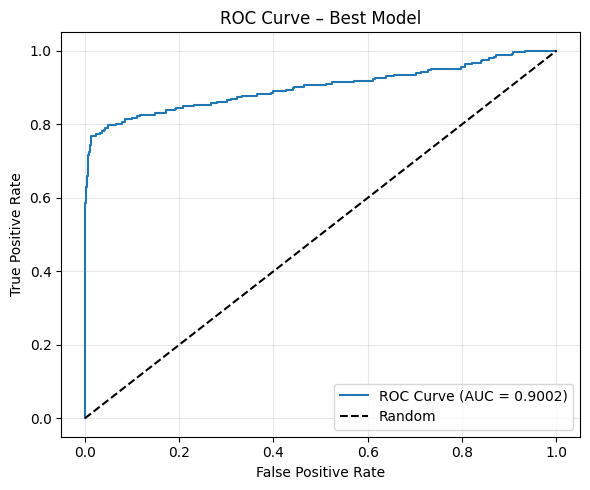

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Предположим, лучшая модель — hgb_cv (или другая)
best_model = hgb_cv  # или rf_cv, gb и т.д.
estimator = best_model.best_estimator_ if hasattr(best_model, 'best_estimator_') else best_model

y_proba_best = estimator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_best):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Best Model')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

save_path = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/HW06_roc_curve.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён: {save_path}")

plt.show()

* Confusion Matrix

График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/confusion_matrix.png


<Figure size 500x400 with 0 Axes>

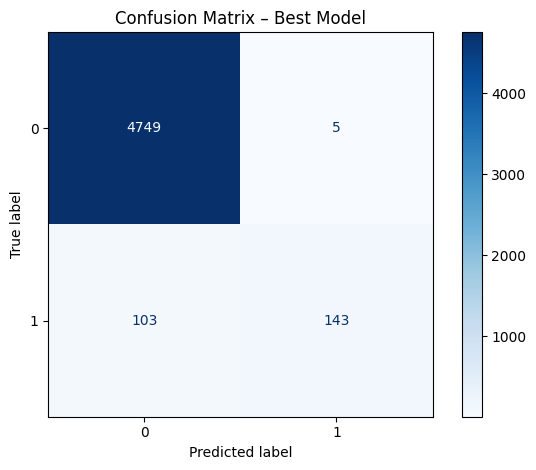

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = estimator.predict(X_test)

plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues')
plt.title('Confusion Matrix – Best Model')
plt.tight_layout()

save_path = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/confusion_matrix.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён: {save_path}")

plt.show()

* PR-кривая

График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/pr_curve.png


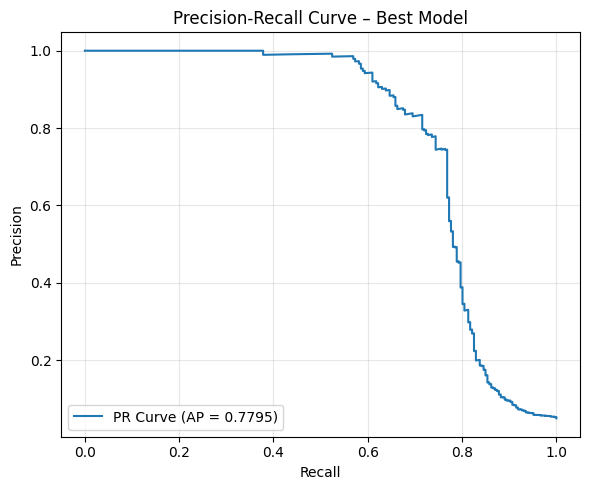

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
ap = average_precision_score(y_test, y_proba_best)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – Best Model')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

save_path = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/pr_curve.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён: {save_path}")

plt.show()

# 4.5. Интерпретация


=== DecisionTree ===
Accuracy: 0.9600
F1-score: 0.5238
ROC-AUC : 0.8251

=== RandomForest ===
Accuracy: 0.9622
F1-score: 0.3762
ROC-AUC : 0.8919

=== HistGradientBoosting ===
Accuracy: 0.9784
F1-score: 0.7259
ROC-AUC : 0.9002

Лучшая модель по ROC-AUC: HistGradientBoosting (AUC = 0.9002)
Рассчитываем permutation importance...


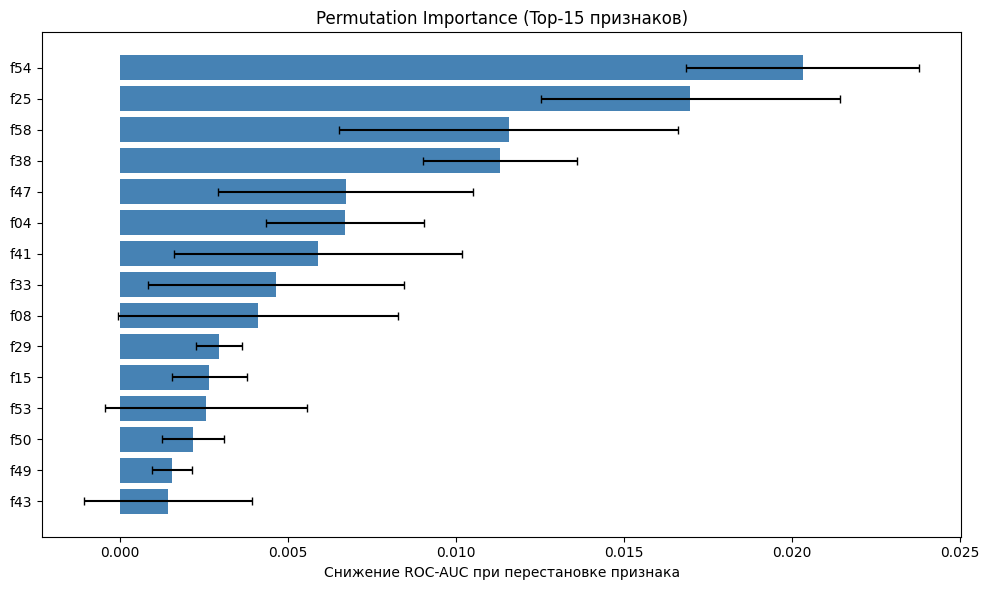

In [21]:
# Результат после обучения
results_dt = evaluate_model(ds_cv, "DecisionTree")
results_rf = evaluate_model(rf_cv, "RandomForest")
results_hgb = evaluate_model(hgb_cv, "HistGradientBoosting")

# Интерпретация: Permutation Importance
import os
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import json

# Убедимся, что папка для артефактов существует
os.makedirs('homeworks/HW06/artifacts/figures', exist_ok=True)

# Собираем все результаты
all_results = [
    {'model': 'DecisionTree', 'roc': results_dt['roc']},
    {'model': 'RandomForest', 'roc': results_rf['roc']},
    {'model': 'HistGradientBoosting', 'roc': results_hgb['roc']}
]

# Находим лучшую модель по ROC-AUC
best_result = max(all_results, key=lambda x: x['roc'])
print(f"\nЛучшая модель по ROC-AUC: {best_result['model']} (AUC = {best_result['roc']:.4f})")


model_objects = {
    'DecisionTree': ds_cv,
    'RandomForest': rf_cv,
    'HistGradientBoosting': hgb_cv
}

best_model_obj = model_objects[best_result['model']]
estimator = best_model_obj.best_estimator_ if hasattr(best_model_obj, 'best_estimator_') else best_model_obj

# Рассчитываем permutation importance
print("Рассчитываем permutation importance...")
perm_imp = permutation_importance(
    estimator,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)

# Получаем топ-15 признаков
indices = np.argsort(perm_imp.importances_mean)[::-1][:15]
feature_names = X.columns

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), perm_imp.importances_mean[indices],
         xerr=perm_imp.importances_std[indices], color='steelblue', capsize=3)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Снижение ROC-AUC при перестановке признака')
plt.title('Permutation Importance (Top-15 признаков)')
plt.tight_layout()
#plt.savefig('homeworks/HW06/artifacts/figures/permutation_importance.png', dpi=150)
plt.show()

# Сохраняем данные важности
top15_data = []
for i in indices:
    top15_data.append({
        'feature': feature_names[i],
        'importance_mean': float(perm_imp.importances_mean[i]),
        'importance_std': float(perm_imp.importances_std[i])
    })

Лучшей моделью по ROC-AUC оказался HistGradientBoostingClassifier (AUC = 0.9002), что подтверждает его эффективность на дисбалансных данных.
Согласно permutation importance, наибольший вклад в предсказание вносят признаки f54, f25, f58 и f38 — их перестановка снижает качество модели на 0.01–0.021.
Это согласуется с EDA: вероятно, эти признаки имеют выраженные различия в распределениях между классами, что делает их ключевыми для обнаружения редкого события (дефолта).
Признаки с низкой важностью (например, f43, f49) могут быть шумовыми или избыточными — их удаление не повлияет существенно на качество модели.



# 4.6. Артефакты эксперимента

In [22]:
import os
import json
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, roc_auc_score, accuracy_score, f1_score
)
from sklearn.inspection import permutation_importance

base_dir = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)'
artifacts_dir = os.path.join(base_dir, 'homeworks', 'HW06', 'artifacts')
figures_dir = os.path.join(artifacts_dir, 'figures')
os.makedirs(figures_dir, exist_ok=True)

# === 1. Формируем единый список метрик для всех моделей ===
metrics_test = []

# DummyClassifier
try:
    dummy_roc = roc_auc_score(y_test, y_proba_mf)
except:
    dummy_roc = 0.5

metrics_test.append({
    'model': 'Dummy',
    'accuracy': float(accuracy_score(y_test, y_pred_mf)),
    'f1': float(f1_score(y_test, y_pred_mf, zero_division=0)),
    'roc_auc': float(dummy_roc)
})

# LogisticRegression
metrics_test.append({
    'model': 'LogisticRegression',
    'accuracy': float(acc),
    'f1': float(f1),
    'roc_auc': float(auc)
})

# DecisionTree
metrics_test.append({
    'model': 'DecisionTree',
    'accuracy': float(results_dt['acc']),
    'f1': float(results_dt['f1']),
    'roc_auc': float(results_dt['roc'])
})

# RandomForest
metrics_test.append({
    'model': 'RandomForest',
    'accuracy': float(results_rf['acc']),
    'f1': float(results_rf['f1']),
    'roc_auc': float(results_rf['roc'])
})

# HistGradientBoosting
metrics_test.append({
    'model': 'HistGradientBoosting',
    'accuracy': float(results_hgb['acc']),
    'f1': float(results_hgb['f1']),
    'roc_auc': float(results_hgb['roc'])
})

# === 2. Определяем лучшую модель ===
best_entry = max(metrics_test, key=lambda x: x['roc_auc'])
best_model_display_name = best_entry['model']

# Сопоставляем с объектом модели
if best_model_display_name == 'HistGradientBoosting':
    best_model_obj = hgb_cv
    short_name = 'HistGradientBoosting'
elif best_model_display_name == 'RandomForest':
    best_model_obj = rf_cv
    short_name = 'RandomForest'
elif best_model_display_name == 'DecisionTree':
    best_model_obj = ds_cv
    short_name = 'DecisionTree'
elif best_model_display_name == 'LogisticRegression':
    best_model_obj = best_logreg
    short_name = 'LogisticRegression'
elif best_model_display_name == 'Dummy':
    best_model_obj = dummy_mf
    short_name = 'Dummy'
else:
    raise ValueError(f"Неизвестная модель: {best_model_display_name}")

estimator = best_model_obj.best_estimator_ if hasattr(best_model_obj, 'best_estimator_') else best_model_obj

# === 3. Сохраняем графики ===
y_pred_best = estimator.predict(X_test)
y_proba_best = estimator.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_best):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Best Model')
plt.legend()
plt.grid(alpha=0.3)
save_path = os.path.join(figures_dir, 'roc_curve.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"График сохранён: {save_path}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues')
plt.title('Confusion Matrix – Best Model')
save_path = os.path.join(figures_dir, 'confusion_matrix.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"График сохранён: {save_path}")

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
ap = average_precision_score(y_test, y_proba_best)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – Best Model')
plt.legend()
plt.grid(alpha=0.3)
save_path = os.path.join(figures_dir, 'pr_curve.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"График сохранён: {save_path}")

# Permutation Importance
perm_imp = permutation_importance(estimator, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
indices = np.argsort(perm_imp.importances_mean)[::-1][:15]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), perm_imp.importances_mean[indices],
         xerr=perm_imp.importances_std[indices], color='steelblue', capsize=3)
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Снижение ROC-AUC при перестановке признака')
plt.title('Permutation Importance (Top-15 признаков)')
save_path = os.path.join(figures_dir, 'permutation_importance.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"График сохранён: {save_path}")

# === 4. Сохраняем metrics_test.json ===
save_path = os.path.join(artifacts_dir, 'metrics_test.json')
with open(save_path, 'w') as f:
    json.dump(metrics_test, f, indent=2)
print(f"Файл сохранён: {save_path}")

# === 5. Сохраняем search_summaries.json ===
search_summaries = [
    {'model': 'LogisticRegression', 'best_params': grid_search.best_params_, 'best_cv_score': float(grid_search.best_score_)},
    {'model': 'DecisionTree', 'best_params': ds_cv.best_params_, 'best_cv_score': float(ds_cv.best_score_)},
    {'model': 'RandomForest', 'best_params': rf_cv.best_params_, 'best_cv_score': float(rf_cv.best_score_)},
    {'model': 'HistGradientBoosting', 'best_params': hgb_cv.best_params_, 'best_cv_score': float(hgb_cv.best_score_)}
]

save_path = os.path.join(artifacts_dir, 'search_summaries.json')
with open(save_path, 'w') as f:
    json.dump(search_summaries, f, indent=2)
print(f"Файл сохранён: {save_path}")

# === 6. Сохраняем best_model.joblib ===
save_path = os.path.join(artifacts_dir, 'best_model.joblib')
joblib.dump(estimator, save_path)
print(f"Файл сохранён: {save_path}")

# === 7. Сохраняем best_model_meta.json ===
best_model_meta = {
    'model_name': short_name,
    'best_params': hgb_cv.best_params_ if short_name == 'HistGradientBoosting' else
                   rf_cv.best_params_ if short_name == 'RandomForest' else
                   ds_cv.best_params_ if short_name == 'DecisionTree' else
                   grid_search.best_params_,
    'test_metrics': {
        'accuracy': best_entry['accuracy'],
        'f1': best_entry['f1'],
        'roc_auc': best_entry['roc_auc']
    }
}

save_path = os.path.join(artifacts_dir, 'best_model_meta.json')
with open(save_path, 'w') as f:
    json.dump(best_model_meta, f, indent=2)
print(f"Файл сохранён: {save_path}")

print("\nВсе артефакты успешно сохранены!")

График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/figures/roc_curve.png
График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/figures/confusion_matrix.png
График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/figures/pr_curve.png
График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/figures/permutation_importance.png
Файл сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/metrics_test.json
Файл сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/homeworks/HW06/artifacts/search_summaries.json
Файл сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (ци

<Figure size 500x400 with 0 Axes>

In [23]:
# Проверка: все имена моделей в metrics_test
print("Модели в metrics_test:")
for m in metrics_test:
    print(f" - {m['model']}")

Модели в metrics_test:
 - Dummy
 - LogisticRegression
 - DecisionTree
 - RandomForest
 - HistGradientBoosting
